### Часть 3: выбор и исследование стратегии выбора числа кластеров.
Реализовано две стратегии:<br>
1) *Стратегия минимальных и максимальных значений*:<br>
Для каждого k в диапазоне от [2, [∛n] + 1] запускается функция KMeans, которая также возвращает массивы с координатами центров кластеров. Каждый раз подсчитывается минимальное внешнекластерное (exter_min) и максимальное внутрикластерное (inter_max) расстояния. Проверяется, начиная с какого значения k изменение отношения exter_min и inter_max становится достаточно малым, и выбирается значение перед ним.<br>
2) *Стратегия среднего внутреннего значения*:<br>
Всё как в первом пункте, но вместо отношения exter_min и inter_max берется среднее внутрикластерное значение.<br><br>

In [1]:
from mylib import *
plt.rc('font', size=14)

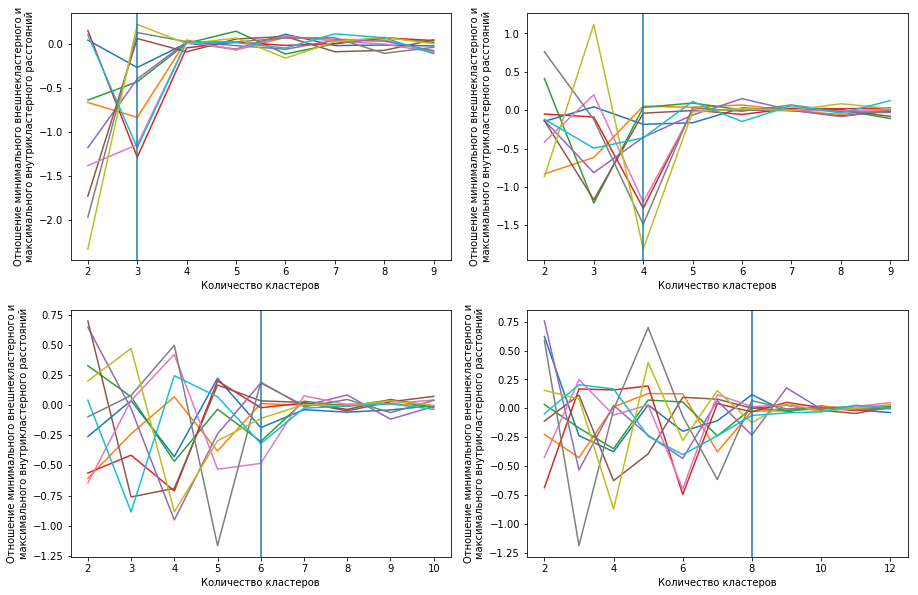

In [3]:
tests = ((800, 3), (950, 4), (1200, 6), (1999, 8))
rows, cols = 2, 2
pylab.figure(0, figsize = (15, 10))
for i in range(len(tests)):
    pylab.subplot(rows, cols, i + 1)
    show_best_K(k = tests[i][1], n = tests[i][0], n_tests = 10)

На картинках выше изображены отношения минимального внешнекластерного и максимального внутрикластерного растояний (одна линия соответсвует одному набору точек, для которого проверяются все значения k из заданного промежутка). Вертикальной линией отмечено действительное количество кластеров, которое было задано для make_blobs. Как видно, графики сильно колеблются до какого-то момента, и, начиная с определенного значения, их изменение становится достаточно малым. Чаще всего этим значением (или значением на единицу меньше) оказывается "правильное" k.

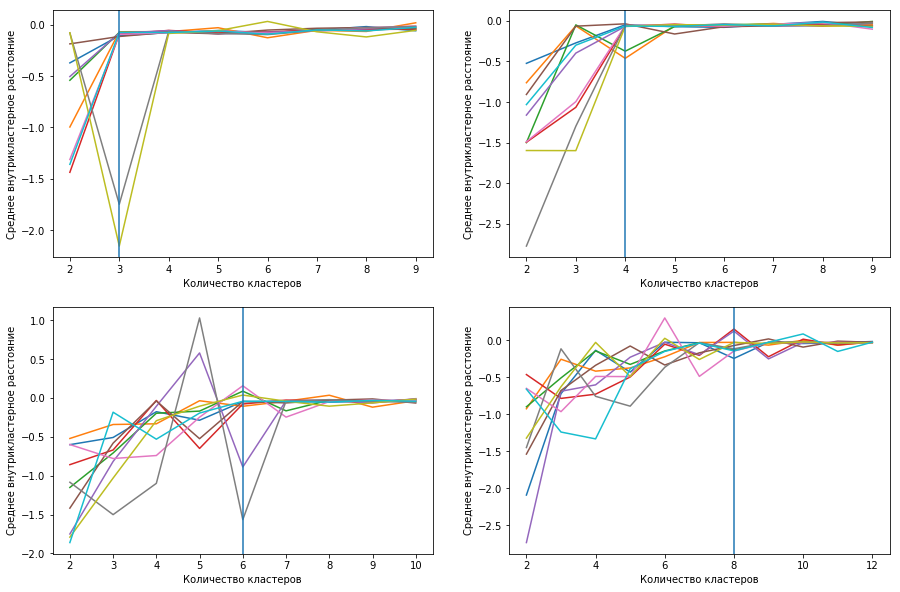

In [4]:
pylab.figure(0, figsize = (15, 10))
for i in range(len(tests)):
    pylab.subplot(rows, cols, i + 1)
    show_best_K(k = tests[i][1], n = tests[i][0], n_tests = 10, strat_mean = True)

То же самое происходит и с графиками средних внутрикластерных расстояний. Поэтому было решено для нахождения "подходящего" количества кластеров выбрать некоторе число eps, в пределах которого может колебаться значение выбранной величины (отношений минимальных и максимальных значений в первом варианте и среднее значение во втором) после прохождения через k, которое мы предполагаем верным. <br>
Чтобы выбрать это число, было проведено некоторое количество испытаний. На графиках ниже изображены результаты тестирования функции best_K **(по стратегии отношений минимальных и максимальных слева и по стратегии средних справа)**, которая для данного массива точек выбирает подходящее количество кластеров. 

[0.25 0.26 0.27 0.28 0.29 0.3 ]
[0.05 0.11 0.12 0.13 0.14 0.15]
[0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29]
[0.1  0.11 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25
 0.26 0.27 0.28 0.29 0.3 ]


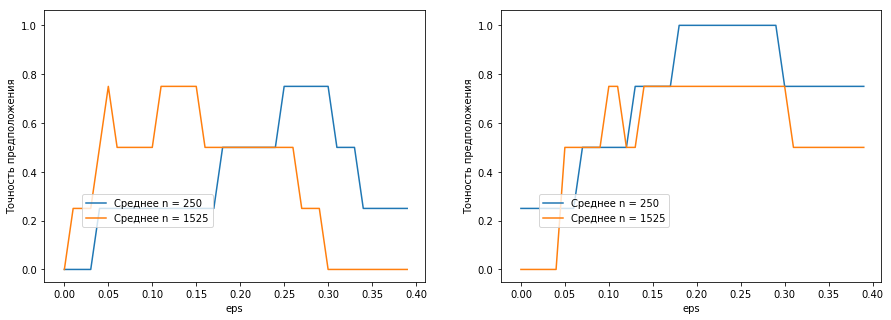

In [2]:
tests1 = np.array(((100, 2), (200, 2), (300, 5), (400, 4)))
tests2 = np.array(((1000, 2), (2000, 3), (1300, 5), (1800, 6)))
epss = [0.01 * x for x in range(40)]
pylab.figure(0, figsize = (15, 5))

pylab.subplot(121)
print(test_eps(tests1, epss, strat = "uniform", strat_mean = False))
print(test_eps(tests2, epss, strat = "uniform", strat_mean = False))

pylab.subplot(122)
print(test_eps(tests1, epss, strat = "uniform", strat_mean = True))
print(test_eps(tests2, epss, strat = "uniform", strat_mean = True))

Как видно по графикам выше, вторая стратегия работает гораздо более точно. Также стоит заметить, что для разного количества данных точек подходят разные eps и точность предположения отличается. Значение eps = 0.25 подходит для обеих стратегий (для второй чуть лучше, но первая и точность меньше выдает, и универсального eps у нее, судя по графику, нет) для разного количества n, поэтому это число было выбрано как значение по умолчанию в функции best_K.

Количество кластеров по предположению: 3


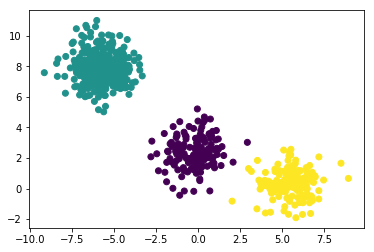

In [11]:
n = 600
k = 4
x, _ = make_blobs(n_samples = n, n_features = 2, centers = k, random_state = 5)
k1, _ = best_K(x, strat = "uniform")
cl, _, _ = KMeans4(x, k = k1)
plt.scatter(x[:, 0], x[:, 1], c = cl)
print("Количество кластеров по предположению:", k1)
plt.show()